In [1]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.preprocessing import image
import tensorflow as tf
import pandas as pd
import numpy as np
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from PIL import Image
import os
import PIL
from keras.layers import Input, Dense, Activation, ZeroPadding2D, Flatten, Conv2D

In [2]:
TEST_IMG_DIR = "/Users/gauravkumar/Downloads/Data/isic-2024-challenge/train-image/image/"
TEST_CSV_DIR = "/Users/gauravkumar/Downloads/Data/isic-2024-challenge/train-metadata.csv"
modelSavePath = '/Users/gauravkumar/Downloads/my_model3.h5'

In [3]:
csv_data = pd.read_csv(TEST_CSV_DIR, low_memory=False);

In [4]:
csv_data.columns

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

In [5]:
def getCropImgs(img, needRotations=False):
    # img = img.convert('L')
    z = np.asarray(img, dtype=np.int8)
    c = []
    for i in range(3):
        for j in range(4):
            crop = z[512 * i:512 * (i + 1), 512 * j:512 * (j + 1), :]

            c.append(crop)
            if needRotations:
                c.append(np.rot90(np.rot90(crop)))

    # os.system('cls')
    # print("Crop imgs", c[2].shape)

    return c

In [6]:
data_new = csv_data[['isic_id', 'target']]

In [7]:
data_new.columns


Index(['isic_id', 'target'], dtype='object')

In [8]:
x_train, x_test, y_train, y_test = train_test_split(csv_data, csv_data['target'], test_size=0.33, random_state=4,
                                                    stratify=csv_data['target'])

In [9]:
x_train.columns

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

In [10]:
print(x_train.size)
print(x_test.size)
print(y_train.size)
print(y_test.size)

14778995
7279250
268709
132350


In [11]:
def defModel(input_shape):
    X_input = Input(input_shape)

    # The max pooling layers use a stride equal to the pooling size

    X = Conv2D(16, (3, 3), strides=(1, 1))(X_input)  # 'Conv.Layer(1)'

    X = Activation('relu')(X)

    X = MaxPooling2D((3, 3), strides=3)(X)  # MP Layer(2)

    X = Conv2D(32, (3, 3), strides=(1, 1))(X)  # Conv.Layer(3)

    X = Activation('relu')(X)

    X = MaxPooling2D((2, 2), strides=2)(X)  # MP Layer(4)

    X = Conv2D(64, (2, 2), strides=(1, 1))(X)  # Conv.Layer(5)

    X = Activation('relu')(X)

    X = ZeroPadding2D(padding=(2, 2))(X)  # Output of convlayer(5) will be 82x82, we want 84x84

    X = MaxPooling2D((2, 2), strides=2)(X)  # MP Layer(6)

    X = Conv2D(64, (2, 2), strides=(1, 1))(X)  # Conv.Layer(7)

    X = Activation('relu')(X)

    X = ZeroPadding2D(padding=(2, 2))(X)  # Output of convlayer(7) will be 40x40, we want 42x42

    X = MaxPooling2D((3, 3), strides=3)(X)  # MP Layer(8)

    X = Conv2D(32, (3, 3), strides=(1, 1))(X)  # Con.Layer(9)

    X = Activation('relu')(X)

    X = Flatten()(X)  # Convert it to FC

    X = Dense(256, activation='relu')(X)  # F.C. layer(10)

    X = Dense(128, activation='relu')(X)  # F.C. layer(11)

    X = Dense(4, activation='softmax')(X)

    # ------------------------------------------------------------------------------

    model = Model(inputs=X_input, outputs=X, name='Model')

    return model

In [12]:
def defModel(input_shape):
    X_input = Input(input_shape)

    # The max pooling layers use a stride equal to the pooling size

    X = Conv2D(16, (2, 2), strides=(1, 1))(X_input)  # 'Conv.Layer(1)'

    X = Activation('relu')(X)

    X = MaxPooling2D((3, 3), strides=3)(X)  # MP Layer(2)

    X = Conv2D(32, (3, 3), strides=(1, 1))(X)  # Conv.Layer(3)

    X = Activation('relu')(X)

    X = MaxPooling2D((2, 2), strides=2)(X)  # MP Layer(4)

    X = Conv2D(64, (2, 2), strides=(1, 1))(X)  # Conv.Layer(5)

    X = Activation('relu')(X)

    X = ZeroPadding2D(padding=(2, 2))(X)  # Output of convlayer(5) will be 82x82, we want 84x84

    X = MaxPooling2D((2, 2), strides=2)(X)  # MP Layer(6)

    X = Conv2D(64, (2, 2), strides=(1, 1))(X)  # Conv.Layer(7)

    X = Activation('relu')(X)

    X = ZeroPadding2D(padding=(2, 2))(X)  # Output of convlayer(7) will be 40x40, we want 42x42

    X = MaxPooling2D((3, 3), strides=3)(X)  # MP Layer(8)

    X = Conv2D(32, (3, 3), strides=(1, 1))(X)  # Con.Layer(9)

    X = Activation('relu')(X)

    X = Flatten()(X)  # Convert it to FC

    X = Dense(256, activation='relu')(X)  # F.C. layer(10)

    X = Dense(128, activation='relu')(X)  # F.C. layer(11)

    X = Dense(4, activation='softmax')(X)

    # ------------------------------------------------------------------------------

    model = Model(inputs=X_input, outputs=X, name='Model')

    return model


In [13]:
# Get the softmax from folder name
def getAsSoftmax(fname):
    if (fname == 'b'):
        return [1, 0]
    else:
        return [0, 1]


In [14]:
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

In [15]:
data_new['img'] = data_new.apply(lambda _: '', axis=1)
data_new['imgcrop'] = data_new.apply(lambda _: '', axis=1)

/var/folders/c9/x7lk2dss3bv89ttknvtmys7w0000gn/T/ipykernel_2711/3893093411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['img'] = data_new.apply(lambda _: '', axis=1)
/var/folders/c9/x7lk2dss3bv89ttknvtmys7w0000gn/T/ipykernel_2711/3893093411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['imgcrop'] = data_new.apply(lambda _: '', axis=1)


In [16]:
data_new.columns
image_list = []


In [17]:
# def addImageDataToPd(basePath, data_new):
#     print("Hello---")
#     image_data = os.listdir(basePath)
#     print("No# of images in data: " , len(image_data))
#     image_files = [f for f in os.listdir(basePath) if f.endswith('.jpg') or f.endswith('.png')]
#     # Iterate through the image files
#     for image_file in image_files:
#        # Open the image file
#        img = Image.open(os.path.join(basePath, image_file))
#        # Convert the image to an array
#        img_array = np.array(img)
#        # Append the image array to the list
#        image_list.append(img_array)
    
    


In [18]:
# addImageDataToPd(TEST_IMG_DIR, data_new)

In [19]:
# df = pd.DataFrame(image_list)
# df.head()

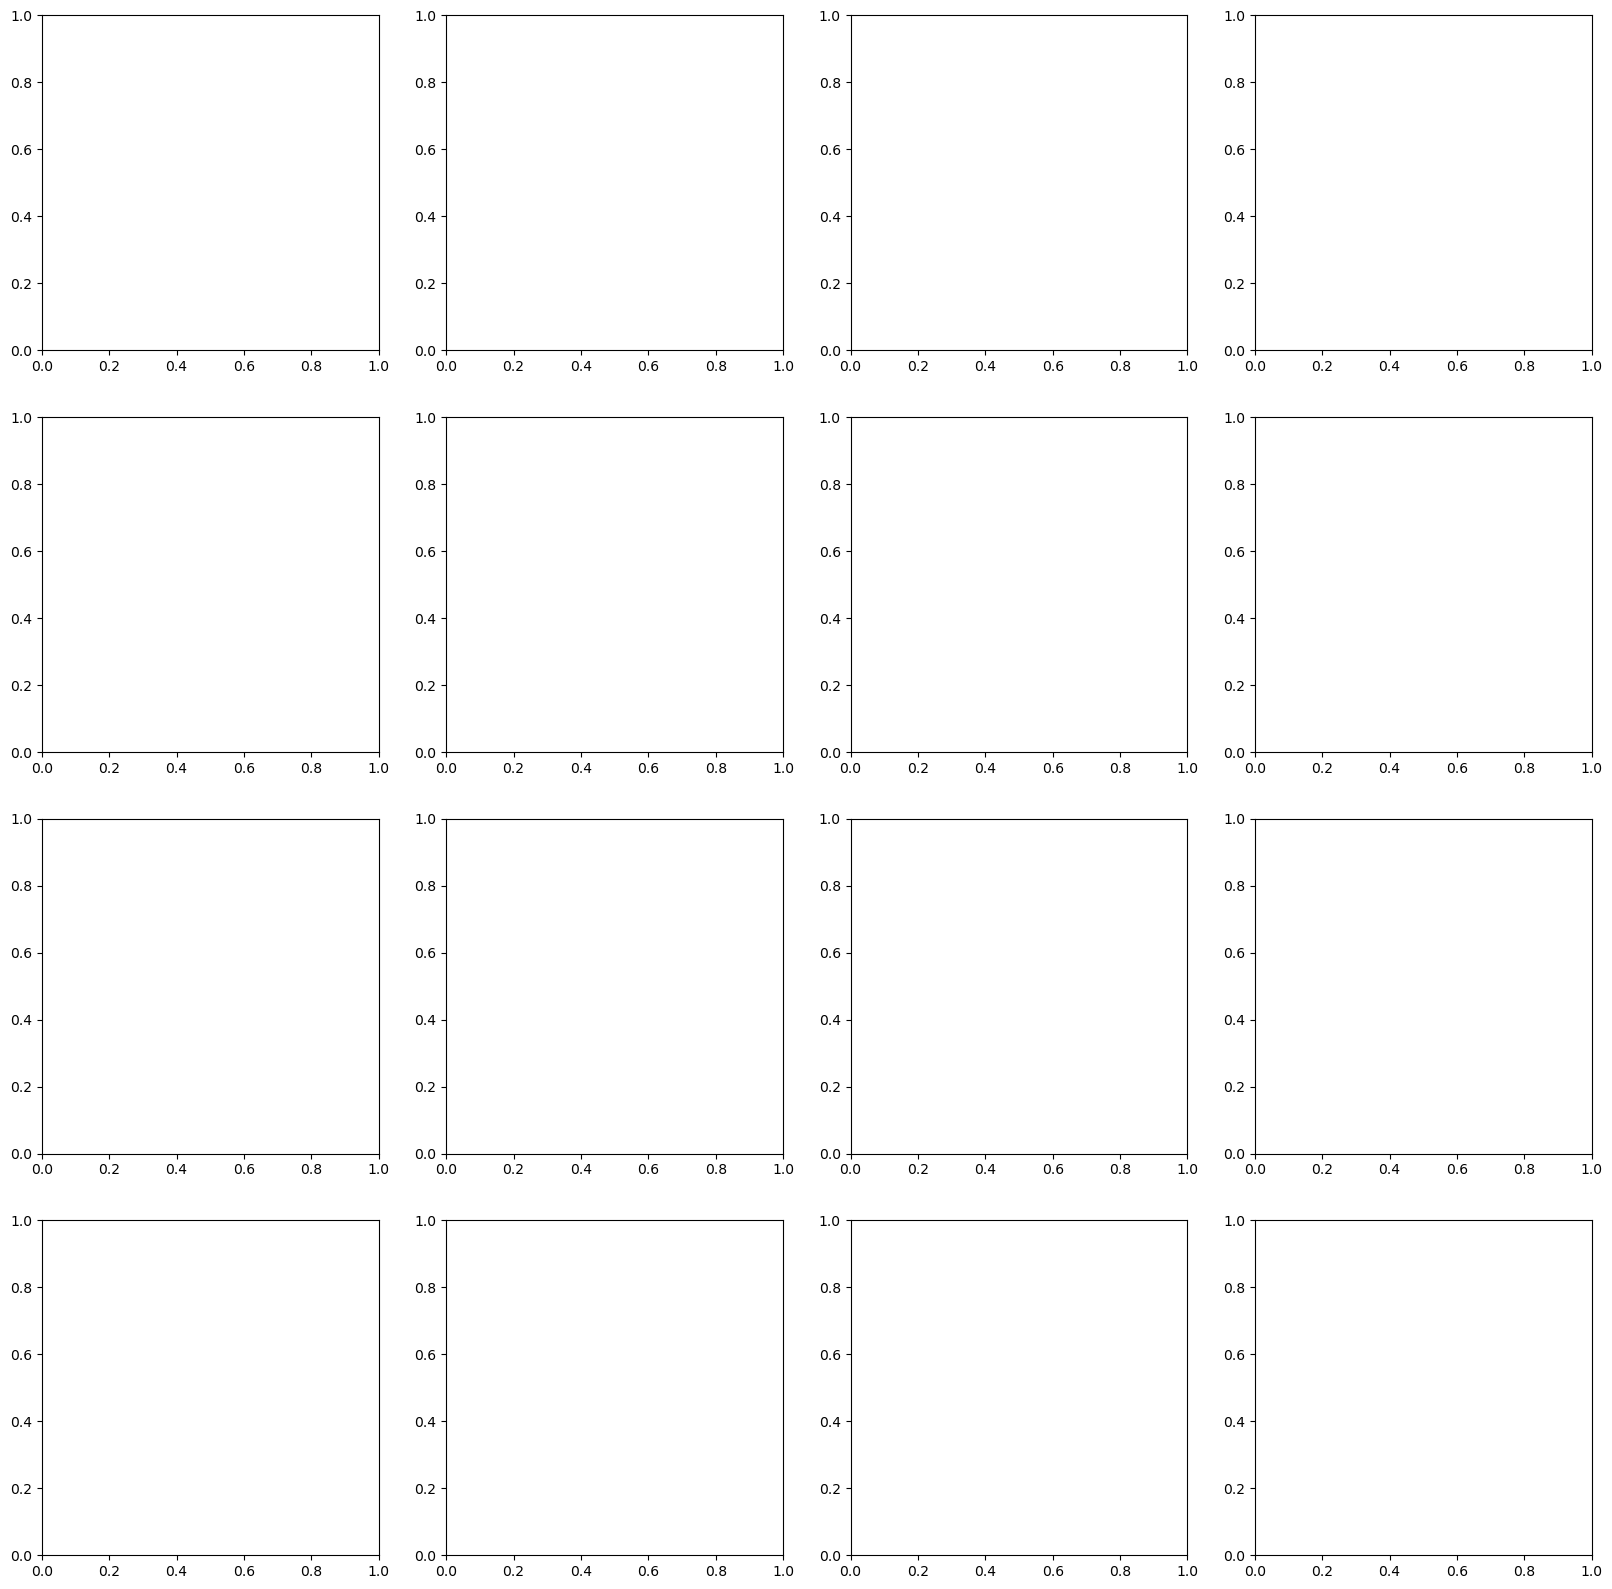

In [20]:
import matplotlib.pyplot as plt

# Get the number of rows in the dataframe
# num_rows = df.shape[0]

# Set the number of rows and columns for the grid
rows = 4
cols = 4

# Create a subplot grid with the specified number of rows and columns
fig, ax = plt.subplots(rows, cols, figsize=(20,20))

# Flatten the subplot grid to a 1-D array
ax = ax.ravel()

# # Iterate through the rows of the dataframe
# for i in range(num_rows):
#     try:
#         # Get the image array from the dataframe
#         img_array = df.iloc[i, 0]
#         # Display the image in the current subplot
#         ax[i].imshow(img_array)
#         ax[i].set_title(f"Image {i}")
#         ax[i].axis("off")
#     except:
#         pass
# # Show the plot
# plt.show()

In [21]:
columns = ['isic_id', 'target', 'img', 'img1']
final_data = pd.DataFrame(columns=columns)

In [22]:
def printImage(data,col_name):
    rows = 4
    cols = 4
    fig, ax = plt.subplots(rows, cols, figsize=(20,20))
    ax = ax.ravel()
    for i in range(5):
       try:
           # Get the image array from the dataframe
           img_array = data[col_name].iloc[i, 0]
           # Display the image in the current subplot
           ax[i].imshow(img_array)
           ax[i].set_title(f"Image {i}")
           ax[i].axis("off")
       except:
           pass
    plt.show()


In [23]:
from matplotlib import pyplot as plt

def printSingleImage(img_array):
   plt.imshow(tempImg, interpolation='nearest')
   plt.show()

In [24]:
final_data.columns

Index(['isic_id', 'target', 'img', 'img1'], dtype='object')

In [25]:
print(x_train.size)
print(x_test.size)
print(y_train.size)
print(y_test.size)
print(data_new.size)

14778995
7279250
268709
132350
1604236


In [26]:
def getImageFromPath(basePath, image_file):
    # print(basePath+''+image_file)
    image_data = os.listdir(basePath)
    img = Image.open(os.path.join(basePath, image_file))
    #print(np.array(img))
    return img

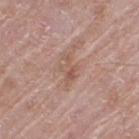

In [27]:
getImageFromPath(TEST_IMG_DIR, 'ISIC_0015670.jpg')

In [28]:
data_new.head(5)

,isic_id,target,img,imgcrop
0,ISIC_0015670,0,,
1,ISIC_0015845,0,,
2,ISIC_0015864,0,,
3,ISIC_0015902,0,,
4,ISIC_0024200,0,,


In [29]:
def getCropImgsWithArray(basePath, image_file):
    # img_array = np.asarray(img, dtype=np.int8)
   Original_Image = getImageFromPath(TEST_IMG_DIR,image_path)
  
   # Rotate Image By 180 Degree 
   rotated_image1 = Original_Image.rotate(180) 
  
   # This is Alternative Syntax To Rotate  
   # The Image 
   # rotated_image2 = Original_Image.transpose(Image.ROTATE_90) 
  
   # This Will Rotate the Image By 60 Degree 
   # rotated_image3 = Original_Image.rotate(60) 
   return rotated_image1;

In [30]:
print(len(data_new))

401059


In [32]:
data_new1 = data_new.head(1000)

In [33]:
print(len(data_new1))

1000


In [34]:
counter = 0

for i in range(0, len(data_new1)):
# for i in range(1):
    image_path = data_new1.iloc[i]['isic_id']+'.jpg'
    data_new1.iloc[i]['img'] = np.array(getImageFromPath(TEST_IMG_DIR,image_path))
    # printSingleImage(data_new.iloc[i]['img'])
    # data_new.iloc[i]['imgcrop'] = np.array(getCropImgsWithArray(TEST_IMG_DIR,image_path))
    # printSingleImage(data_new.iloc[i]['imgcrop'])
    if(counter%1000 ==0):
       print(counter, end =" ")
    counter += 1

/var/folders/c9/x7lk2dss3bv89ttknvtmys7w0000gn/T/ipykernel_2711/3105417737.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new1.iloc[i]['img'] = np.array(getImageFromPath(TEST_IMG_DIR,image_path))


0 100 200 300 400 500 600 700 800 900 

In [35]:
x1_train, x1_test, y1_train, y1_test = train_test_split(data_new1, data_new1['target'], test_size=0.33, random_state=4,
                                                    stratify=data_new1['target'])

In [47]:
def train(batch_size, epochs):
    # sess = tf.Session()
    # keras.backend.set_session(sess)

    model = defModel(x1_train.shape[1:])

    model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
    while True:
        try:
            model = load_model(modelSavePath)
        except:
            print("Training a new model")

        model.fit(x1_train, y1_train, epochs=epochs, batch_size=batch_size) # <>

        model.save(modelSavePath)

        preds = model.evaluate(x1_test, y1_test, batch_size=1, verbose=1, sample_weight=None)
        print(preds)

        print()
        print("Loss = " + str(preds[0]))
        print("Test Accuracy = " + str(preds[1]) + "\n\n\n\n\n")
        ch = input("Do you wish to continue training? (y/n) ")
        if ch == 'y':
            epochs = int(input("How many epochs this time? : "))
            continue
        else:
            break

    return model

In [48]:
def predict(img, showImg=True):
    model = load_model(modelSavePath)
    # if showImg:
    # Image.fromarray(np.array(img, np.float16), 'RGB').show()

    x = img
    if showImg:
        Image.fromarray(np.array(img, np.float16), 'RGB').show()
    x = np.expand_dims(x, axis=0)

    softMaxPred = model.predict(x)
    print("prediction from CNN: " + str(softMaxPred) + "\n")
    probs = softmaxToProbs(softMaxPred)

    # plot_model(model, to_file='Model.png')
    # SVG(model_to_dot(model).create(prog='dot', format='svg'))
    maxprob = 0
    maxI = 0
    for j in range(len(probs)):
        # print(str(j) + " : " + str(round(probs[j], 4)))
        if probs[j] > maxprob:
            maxprob = probs[j]
            maxI = j
    # print(softMaxPred)
    print("prediction index: " + str(maxI))
    return maxI, probs

In [49]:
def softmaxToProbs(soft):
    z_exp = [np.math.exp(i) for i in soft[0]]
    sum_z_exp = sum(z_exp)
    return [(i / sum_z_exp) * 100 for i in z_exp]

In [50]:
x1_train = np.expand_dims(x1_train, axis=-1)
#x1_train = x1_train.reshape(-1, 28, 28, 1)


In [51]:
model = train(batch_size=5, epochs=2)

ValueError: Exception encountered when calling layer "conv2d_3" (type Conv2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node conv2d_3/Conv2D/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](conv2d_3/Conv2D/Reshape, conv2d_3/Conv2D/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,1], [2,2,1,16].

Call arguments received by layer "conv2d_3" (type Conv2D):
  • inputs=tf.Tensor(shape=(None, 4, 1, 1, 1), dtype=float32)